In [57]:
# Libraries
#nbconvert:hide_input

import pandas as pd
from matplotlib import pyplot as plt

import plotly.express as px

import plotly.graph_objects as go

import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
plt.rcParams.update({"font.size": 14, "axes.labelweight": "bold", "lines.linewidth": 2})

In [58]:
#nbconvert:hide_input
df = pd.read_csv("../../data/processed/ail_price.csv", parse_dates=["date"], index_col="date")
df = df.sort_values(by="date")

features = pd.read_csv("../../data/processed/complete_data/features.csv", parse_dates=["date"], index_col="date")
target = pd.read_csv("../../data/processed/complete_data/target.csv", parse_dates=["date"], index_col="date")
results = pd.read_csv("../../results/rolling_predictions_rmse.csv")

features = features.sort_values(by="date")
price = pd.DataFrame(df['price'])
feature_df = pd.merge(features, target, left_index=True, right_index=True)

In [59]:
results = pd.read_csv("../../results/rolling_predictions_rmse.csv")

results = results.reset_index(drop=True)
results

1_step_rmse  2_step_rmse  3_step_rmse  4_step_rmse  5_step_rmse  \
0   154.369503   155.616557   155.638718   154.805034   149.000307   

   6_step_rmse  7_step_rmse  8_step_rmse  9_step_rmse  10_step_rmse  \
0   147.458816   147.313951   151.556615   154.455119    150.078725   

   11_step_rmse  12_step_rmse model_start_date prediction_end_date  
0    143.262775    138.845353       2022-12-01          2023-02-02

In [60]:
import pandas as pd
from datetime import datetime

# Convert string to datetime
results['model_start_date'] = pd.to_datetime(results['model_start_date'])
results['prediction_end_date'] = pd.to_datetime(results['prediction_end_date'])

# Get day from date
start_day = results['model_start_date'].dt.strftime('%b %d %Y')[0]
end_day = results['prediction_end_date'].dt.strftime('%b %d %Y')[0]

print(f"The training data is from {start_day} to Jan 31 2023.")
print(f"The test data is from Feb 01 2023 to {end_day}.\n")
# Select desired columns
selected_columns = results[["1_step_rmse", "2_step_rmse", "3_step_rmse", "4_step_rmse", "5_step_rmse",
                       "6_step_rmse", "7_step_rmse", "8_step_rmse", "9_step_rmse", "10_step_rmse",
                       "11_step_rmse", "12_step_rmse"]]

selected_columns = selected_columns.reset_index(drop=True)

selected_columns = selected_columns[["1_step_rmse", "2_step_rmse", "3_step_rmse", "4_step_rmse", "5_step_rmse",
                       "6_step_rmse", "7_step_rmse", "8_step_rmse", "9_step_rmse", "10_step_rmse",
                       "11_step_rmse", "12_step_rmse"]]

selected_columns

The training data is from Dec 01 2022 to Jan 31 2023.
The test data is from Feb 01 2023 to Feb 02 2023.



1_step_rmse  2_step_rmse  3_step_rmse  4_step_rmse  5_step_rmse  \
0   154.369503   155.616557   155.638718   154.805034   149.000307   

   6_step_rmse  7_step_rmse  8_step_rmse  9_step_rmse  10_step_rmse  \
0   147.458816   147.313951   151.556615   154.455119    150.078725   

   11_step_rmse  12_step_rmse  
0    143.262775    138.845353

## Final Report : Power Price Prediction

### Contributors

- Arjun Radhakrishnan
- Sneha Sunil
- Gaoxiang Wang
- Mehdi Naji

### Executive Summary 

 Numerous Alberta-based organizations rely heavily on energy to fuel their business operations and are in search of an effective forecasting tool that offers accurate and interpretable predictions. Our business solution precisely addresses this need by offering an interpretable and explainable data science product deployed on the cloud, specifically designed for power price prediction in the Alberta Energy Market. Our solution equips organizations with the ability to make knowledgeable decisions about their energy purchases by forecasting hourly energy prices for the next 12 hours, supplemented with confidence intervals. The solution will also address the lack of interpretability and explainability of predictions in the current system[[1]](https://aeso-portal.powerappsportals.com/data-portal-dashboard/) which only forecasts for the next 6 hours. Our real-time prediction pipeline, deployed on Databricks, is complemented by an intuitive Tableau dashboard. This dashboard displays pertinent visualizations, enabling stakeholders to monitor real-time hourly predictions along with their associated margins of error.

### Introduction

Over the past few decades, the electricity markets have undergone a significant transformation, shifting from regulated to competitive and deregulated environments. In the province of Alberta, the electricity market operates within a framework where prices are determined by the interplay of supply and demand dynamics in a competitive marketplace. Prices are influenced by various participants in the market, including power generators, transmission companies, and retailers. Consequently, the deregulated nature of the electricity market in Alberta plays a crucial role in the volatility of power prices. To illustrate the extent of this volatility, an interactive plot below vividly showcases the substantial variations in price. As you explore the plot, you will witness the dramatic ups and downs, serving as a testament to the dynamic nature of the pool price. This serves as a striking reminder of the inherent complexity of the data science problem that needs to be addressed.

In [88]:
fig = px.line(df, y="price")
fig.update_layout(
    title={
        "text": "Energy Pool Price Variation Over Time",
        "font": {"size": 18, "family": "Arial", "color": "black"},
        "y": 0.97,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    xaxis_title={
        "text": "Date",
        "font": {"size": 18, "family": "Arial", "color": "black"},
    },
    yaxis_title={
        "text": "Price",
        "font": {"size": 18, "family": "Arial", "color": "black"},
    },
    xaxis_range=["2023-03-01", "2023-03-31"],
    height=500,
)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list(
            [
                dict(count=1, label="Daily", step="day", stepmode="backward"),  
                dict(count=1, label="1-Month", step="month", stepmode="backward"),
                dict(count=6, label="6-Month", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1-Year", step="year", stepmode="backward"),
                dict(step="all")
            ]
        )
    ),
)



# Add figure subtext below the x-axis title
fig.update_layout(
    annotations=[
        dict(
            xref="paper",
            yref="paper",
            x=0.5,
            y=-0.65,
            text="Figure 1 : Variation of Energy pool price through time ",
            font={"size": 15, "color": "black"},
            showarrow=False,
        )
    ]
)
fig.show()


In [62]:
price = pd.DataFrame(df['price'])
ppx = pd.DataFrame()
ppx['std'] = price.groupby(price.index.year).std()
ppx['mean'] = price.groupby(price.index.year).mean()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=ppx.index,
    y=ppx['mean'],
    error_y=dict(
        type='data',
        array=ppx['std'],
        visible=True
    ),
    marker=dict(color='red'),
    opacity=0.7
))

fig.update_layout(
    title='Mean and Standard Deviation of Power Pool Price in Alberta',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Power Pool Price (CAD)'),
    showlegend=False,
    width=1000,  # Set the desired width of the image
    height=600  # Set the desired height of the image
)

fig.show()


Energy-intensive industries in Alberta heavily depend on accurate price predictions to plan for future energy costs, optimize their operations and mitigate the effects of price fluctuations. In light of the growing uncertainty caused by escalating price volatility, the significance of accurate electricity price predictions cannot be emphasized enough. These predictions play a pivotal role in enabling stakeholders, including energy buyers, to navigate the market successfully by efficiently strategizing their operations. Currently, these organizations depend on energy forecasting tool published by AESO - Alberta Electric System Operator to determine their energy costs in advance as they purchase large quantities of energy based on demand for their business operations. AESO is an independent system operator in Alberta responsible for operating the electrical grid, facilitating the competitive electricity market, and managing the entire power distribution system for the province. The power pool price for every hour is finalized by AESO based on supply and demand. However, the current energy forecasts published by AESO only provide a short-term coverage of 6 hours into the future, which is volatile and lacks interpretation or model visibility. Moreover, they do not quantify the uncertainty associated with the predictions. 

To reduce their expenses, companies could plan and potentially explore alternative energy options if they have access to accurate forecasts which covers a longer window and is also interpretable and explainable. To address the challenges faced by organizations in Alberta, our cutting-edge product offers a comprehensive solution that empowers them to effectively analyze costs, optimize energy purchases, and ultimately maximize their profits. The scientific objectives of our product are 

- Forecasting energy prices for the next 12 hours 
- Interpretability and explainability of predictions 
- Scalable and real-time prediction pipeline
- Reactive Tableau Dashboard for visualizing the real-time results

### Data Science Techniques


Our project utilized two primary data sources: 

**Open-source Tableau Data**: We had access to historical hourly time series data published by AESO in Tableau. 

**Open-source API Data**:  AESO provides a public API service that grants us access to real-time and historical data for specific selective features.

Our initial dataset consisted of approximately 110 features and ~ 72,000 rows, covering various aspects such as power generation/supply by fuel type, energy load distribution across regions, import and export data, and system marginal price data. The primary target we focused on forecasting was the power pool price (CAD). This price represents the balanced average power price per hour for the Alberta province as determined by AESO. It is capped between 0 and 1000 to ensure that the Alberta electricity market is stable and fair. Our feature set predominantly comprises numerical data, with one exception of an ordinal feature that was engineered by us.

In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=4, cols=2, subplot_titles=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    vertical_spacing=0.08, horizontal_spacing=0.05)  # Adjust the vertical and horizontal spacing values as desired

# Loop through days of the week and plot data
for i in range(7):
    day = df[df.index.dayofweek == i]
    scatter = go.Scatter(
        x=day.index.hour,
        y=day["price"],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.3,
            color=i,
            colorscale='Viridis'
        ),
        name=day.index[0].strftime("%A")
    )
    fig.add_trace(scatter, row=(i // 2) + 1, col=(i % 2) + 1)

# Set layout
fig.update_layout(
    height=1000,
    width=1200,  # Adjust the width as desired
    showlegend=False,
    title="Exploring Daily Seasonality of Price Variation",
    title_font=dict(size=18),
)

# Update axis labels
fig.update_xaxes(title_text="Hour of Day", row=4, col=1)
fig.update_yaxes(title_text="Price", row=2, col=1)

# Show plot
fig.show()


Examining the plots reveals consistent trends in energy prices. On weekdays, prices are higher during peak hours (8 am to 8 pm) due to increased demand from business operations. Weekdays also show lower prices during off-working hours. However, weekends have a different pattern, with higher prices in the evenings. These observations are supported by the autocorrelation function plots, which clearly demonstrate daily seasonality in energy prices. Notably, Tuesdays have the highest average prices among weekdays. To capture the combined effects of day, hour, and peak/off-peak hours, an ordinal feature called 'weekly_profile' was created to comprehensively represent time-related variables and energy pricing dynamics.

In [64]:
import plotly.graph_objects as go

# Calculate the average power price for each hour of the day
average_price = df.groupby(df.index.hour)['price'].mean()

# Create the plotly figure
fig = go.Figure()

# Add a scatter trace for the average power price
fig.add_trace(go.Scatter(
    x=average_price.index,
    y=average_price,
    mode='markers',
    marker=dict(symbol='circle', size=8),
    name='Average Power Price'
))

# Add a line trace for the average power price
fig.add_trace(go.Scatter(
    x=average_price.index,
    y=average_price,
    mode='lines',
    line=dict(color='blue', width=4),  # Set line width to 2
    name='Average Power Price Line'
))

# Update layout
fig.update_layout(
    title={
        'text': 'Average Power Price by Hour of the Day',
        'x': 0.5,  # Center the title
        'y': 0.9,  # Increase the y position for title size
        'xanchor': 'center',  # Center the title horizontally
        'yanchor': 'top',  # Anchor the title from the top
        'font': dict(size=24)  # Increase the title font size
    },
    xaxis=dict(
        title='Hour of the Day',
        tickmode='array',
        tickvals=list(range(24)),
        ticktext=[str(i) for i in range(24)],
        tickfont=dict(size=14, family='Arial, bold'),  # Bold and increased size for x-axis tick labels
    ),
    yaxis=dict(
        title='Average Power Price(CAD)',
        tickfont=dict(size=14, family='Arial, bold'),  # Bold and increased size for y-axis tick labels
    ),
    showlegend=False,  # Remove the legends,
    width=1000  # Decrease the width of the plot
)

# Show the plot
fig.show()


In [65]:
import plotly.graph_objects as go

# Filter the data for the year 2021 and beyond
data_gt_2021 = df[df.index.year >= 2021]

# Calculate the average power price for each day of the week
average_price = data_gt_2021.groupby(data_gt_2021.index.dayofweek)['price'].mean()

# Define the days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create the plotly figure
fig = go.Figure()

# Add a scatter trace for the average power price
fig.add_trace(go.Scatter(
    x=days_of_week,
    y=average_price,
    mode='markers+lines',
    marker=dict(symbol='circle', size=8, color='green'),  # Set marker color to green
    line=dict(color='green', width=5),  # Set line color to green and increase line width
    name='Average Power Price'
))

# Update layout
fig.update_layout(
    xaxis=dict(
        title='Day of the Week',
        tickmode='array',
        tickvals=list(range(7)),
        ticktext=days_of_week,
        tickfont=dict(size=14, family='Arial, bold')  # Bold and increased size for x-axis tick labels
    ),
    yaxis=dict(
        title='Average Power Price',
        tickfont=dict(size=14, family='Arial, bold')  # Bold and increased size for y-axis tick labels
    ),
    showlegend=False,
    title={
        'text': 'Average Power Price by Day of the Week',
        'x': 0.5,  # Center the title
        'y': 0.9,  # Increase the y position for title size
        'xanchor': 'center',  # Center the title horizontally
        'yanchor': 'top',  # Anchor the title from the top
        'font': dict(size=24)  # Increase the title font size
    },
    width=1000  # Decrease the width of the plot
)

# Show the plot
fig.show()


This is an autocorrelation function plot with 50 lags for the pool price. We can clearly see a daily seasonality in this plot (for every 24 hours).
Note : ACF plot depicts the correlation between the price and its lagged values

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm

# Calculate ACF
acf_values, confint_acf = sm.tsa.stattools.acf(price['price'], nlags=50, alpha=0.05)

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Add ACF subplot
fig.add_trace(
    go.Bar(
        x=list(range(len(acf_values))),
        y=acf_values,
        marker=dict(color='#ff7f0e')
    ),
    row=1, col=1
)

# Update layout
fig.update_layout(
    title={
        'text': 'Correlogram of prices (Hourly)',
        'x': 0.5,  # Center the title
        'xanchor': 'center',  # Center the title,
        'font': dict(size=24)  # Increase the title font size
    },
    xaxis=dict(title='Lags (Hourly)'),
    yaxis1=dict(title='ACF'),
    showlegend=False,
    width=1000  # Decrease the width of the plot
)

# Show the plot
fig.show()


#### Data preprocessing

In our pursuit to accurately predict future prices based on historical values of influential factors like supply and demand, we transformed the time-series data of all the features into a tabular format by creating lagged versions of both the target variable and the relevant features. Each lagged version corresponds to a specific hour, with the price for that hour being used as the target variable. 

In [67]:
import plotly.graph_objects as go

# Create a violin plot of price with increased size
fig = go.Figure(data=go.Violin(x=df['price'], box_visible=False, meanline_visible=True,
                              fillcolor='#32CD32', line_color='black', width=0.8))

# Update layout
fig.update_layout(
    title={
        'text': 'Distribution of Price',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Center the title
    },
    xaxis=dict(title='Price', range=[0, 200]),
    yaxis=dict(title=None, showticklabels=False),
    showlegend=False,
    width=800,  # Set the width of the plot
    height=500  # Set the height of the plot
)

# Show the plot
fig.show()


#### Feature Selection and Engineering

In the process of feature selection out of 110 features, our primary strategy involved examining the correlations between various features and the price in the preliminary round. Considering the importance of interpretability in our model, we also conducted comprehensive market research and engineered several key features showing a significant correlation with the price. One such feature is the gas reserve margin reserve, a buffer/reserve of gas, readily available to generate electricity to meet sudden load demands and peak hours. As evidenced in our data visualizations, a dwindling gas reserve tends to correspond with an increase in price. In the case of gas supply mix which is the proportion of energy generation using gas by the total energy generation, when the supply is mostly using gas, the price increases as gas is costly compared to the rest of the sources. 

For more information about the key engineered features, please check out the [glossary](https://github.com/slalom-ubc-mds/Power-Price-Prediction/blob/main/notebooks/final_report/glossary.ipynb)


In [68]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the data within the desired date range
final_2022_df = feature_df[(feature_df.index >= '2022-11-15') & (feature_df.index <= '2022-12-19')]
# Create subplot figure with 2 rows and 1 column
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

# Add first trace for price subplot
fig.add_trace(go.Scatter(x=final_2022_df.index, y=final_2022_df['price'], name="Pool Price", hovertemplate='Date: %{x}<br>Price: %{y}<br>Day of week: %{x|%A}', line=dict(width=4) ), row=1, col=1)

# Add second trace for temperature subplot
fig.add_trace(go.Scatter(x=final_2022_df.index, y=final_2022_df['gas_reserve_margin'], name="Gas Reserve Margin", hovertemplate='Date: %{x}<br>Price: %{y}<br>Day of week: %{x|%A}', line=dict(width=4)), row=2, col=1)

fig.add_trace(go.Scatter(x=final_2022_df.index, y=final_2022_df['gas_supply_mix'], name="Gas Suply Mix", hovertemplate='Date: %{x}<br>Price: %{y}<br>Day of week: %{x|%A}', line=dict(width=4)), row=3, col=1)

fig.update_layout(
    title={
        "text": "Pool price Over Time",
        "font": {"size": 18, "family": "Arial", "color": "black"},
        "y": 0.97,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    xaxis_title={
        "font": {"size": 18, "family": "Arial", "color": "black"}
    },
    height=800,
    yaxis1={
        "title": "Price",
        "titlefont": {"size": 18, "family": "Arial", "color": "black"},
        "tickvals": [0, 250, 500, 750, 1000], # Set tick values for price yaxis,
        "side": "left", # Set yaxis to left side
    },
    yaxis2={
        "title": "Gas Reserve Margin",
        "titlefont": {"size": 18, "family": "Arial", "color": "black"},
        "side": "left", # Set yaxis to right side,
        "showgrid": True, # Show grid lines,

    },
    yaxis3={
        "title": "Gas Suply Mix",
        "titlefont": {"size": 18, "family": "Arial", "color": "black"},
        "side": "left", # Set yaxis to right side,
        "showgrid": True, # Show grid lines,
        "zeroline": True, # Add dark line at y=0 on x-axis
        "zerolinecolor": "black", # Set the color of the zeroline to black
        "zerolinewidth": 2, # Set the width of the zeroline to 2

    },
    shapes=[
        {
            "type": "line",
            "x0": 0,
            "x1": 1,
            "xref": "paper",
            "y0": 68.839691,
            "y1": 68.839691,
            "yref": "y3",
            "line": {"color": "black", "width": 2},
        },       
        {
            "type": "line",
            "x0": 0,
            "x1": 1,
            "xref": "paper",
            "y0": 14.095177,
            "y1": 14.095177,
            "yref": "y2",
            "line": {"color": "black", "width": 2},
        },       
        # {
        #     "type": "line",
        #     "x0": 0,
        #     "x1": 1,
        #     "xref": "paper",
        #     "y0": 159.876516,
        #     "y1": 159.876516,
        #     "yref": "y1",
        #     "line": {"color": "black", "width": 2},
        # }
    ],
    xaxis={
        "showgrid": True, # Show grid lines,
    },
)

# Add slider
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1,
        nticks=10,
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="Daily", step="day", stepmode="backward"),  
                    dict(count=1, label="1-Month", step="month", stepmode="backward"),
                    dict(count=6, label="6-Month", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1-Year", step="year", stepmode="backward"),
                    dict(step="all")
                ]
            )
        ),
        rangeslider=dict(visible=True, thickness=0.01, borderwidth=0)
    )
)

fig.show()


We further refined our feature set by leveraging the coefficients from an Elastic Net CV model, and the feature importances deduced from training a Random Forest Regressor model. 

Pursuing a second strategy, we investigated the correlation between lagged features and future prices projected for periods ranging from 1 to 12 hours. We identified features exhibiting correlations of absolute value greater than 0.3 and incorporated them into our feature set. Interestingly, both strategies resulted in almost identical sets of features.

In [69]:

feature_df = feature_df[(feature_df.index >= '2022-01-01')]
corr_df = feature_df[['gas_supply_mix', 'wind_supply_mix', 'wind_reserve_margin', 'gas_reserve_margin', 'gas_tng', 'load_on_gas_reserve', 'price']]

In [70]:
import pandas as pd
import plotly.express as px

# Calculate the correlation matrix using Spearman method
corr = corr_df.corr(method='spearman')

# Select the correlation with the 'price' feature
corr_with_price = corr['price']

# Transpose the correlation matrix
corr_transposed = pd.DataFrame(corr_with_price).T

# Create the transposed correlation matrix plot using Plotly Express
fig = px.imshow(corr_transposed,
                color_continuous_scale='viridis',
                title="Correlation Matrix for Top Features and Price")

fig.update_layout(
    width=1000,
    height=500,
)

fig.show()


#### Modelling Strategy

Since the price is extremely volatile, tackling our first scientific objective which is forecasting energy for the next 12 hours seemed like a complex task. Hence, we needed models that are apt for time series forecasting which can pick up the temporal patterns. As a baseline model for our problem, we chose the **SARIMA** model which is a classical statistical model as it supported probabilistic forecasting and the generation of confidence intervals. Using SARIMA, we performed univariate forecasting, predicting future values based on past values alone. To assess model performance, we selected the Root Mean Square Error (RMSE) as our evaluation metric. RMSE was chosen because it aligns with our project's focus on interpretability and is easily understandable as the error value is in the same scale as the actual values, measured in CAD. Our evaluation of the ARIMA model resulted in an average error of 83.85 CAD, with a standard deviation of approximately 73.11 CAD.

However, recognizing that our problem involved multi-step forecasting, we decided to transition to more sophisticated machine-learning models to improve the accuracy of our forecasts. In this approach, we incorporated the key engineered features we had developed in addition to using past price values.

For our forecasting horizon of 12 steps, we implemented the direct strategy in our modeling approach. This involved training 12 individual models, each responsible for predicting the power price for a specific timestep within the forecasting horizon (1, 2, 3... 12). With the direct strategy, all 12 models were trained using the same historical data until the cut-off point. The cut-off hour refers to the specific point in time up to which you use the data to train your model. Each model was designed to directly forecast the target value for its respective timestep. For example, Model 1 would consistently predict the power price for the next timestep, while Model 12 would forecast the price for 12 timesteps into the future. By adopting this approach, we avoided the accumulation of errors and controlled error propagation that can occur in the recursive strategy. Additionally, when a new data point became available, we updated the cut-off time by 1 hour and retrained all 12 models using the most recent data. This allowed us to continuously incorporate real-time data and ensure reliable future predictions. 

To build our base pipeline, we leveraged the sktime package, a widely-used package that supports time series forecasting and enables the application of machine learning models on time series data. One drawback of our approach was that whenever a new data point became available, we needed to refit the data to all 12 models, which could be time-consuming and impact real-time responsiveness. To address the challenge of refit time using sktime package, we implemented custom code that significantly reduced the refit times from approximately 4.5 minutes to less than 0.5 seconds. This optimization was a significant achievement for us, allowing us to overcome the computational burden and enhance the efficiency of our pipeline.

For more information about the experimented models and process of cross validation, please check the Appendix section.

#### Cross Validation Results 

As seen from the above results, the Light GBM, XGBoost, and Elastic NET CV models all demonstrated good performance according to the RMSE metric, but Light GBM excelled, considering our specific needs. Its computational efficiency, rapid fit times, and warm state capability - which retains and updates previously learned data - made it ideal for quick model updates when AESO published new data. Additionally, Light GBM uniquely captured spikes in prices, whereas the other models struggled to capture such sudden changes, resulting in flatter predictions despite their lower RMSEs. Furthermore, the standard deviation of errors was smaller in comparison to the other models. Light GBM also supported quantile regression, enabling us to generate confidence intervals for our predictions. All in all, its superior performance and adaptability made Light GBM the best model for our forecasting pipeline.

#### Interpretibility of predictions

To achieve our second scientific objective of obtaining feature importance and interpreting the predictions of our model, we relied on the **SHAP (SHapley Additive exPlanations)** framework. SHAP enables us to explain and interpret the individual predictions made by our model. For each prediction the model makes, we can easily obtain the SHAP values of each of the features for this prediction, which will quantify the impact and contribution of each feature for the prediction. To quantify the uncertainty of our predictions, we utilized quantile regression to obtain the 95% confidence intervals. 

For more information, please check the Appendix section.

#### Test Results 

Coming to the most awaited test results, our modeling pipeline outperformed AESO's model across all timesteps for the time range of May 25 - May 31st as shown in the table. Our prediction pipeline demonstrates superiority not just in short-term 1-step and 2-step forecasts but continues to maintain lower RMSE values across multiple steps, right up to 12-step forecasts. Importantly, our model also can make forecasts beyond the 6-step limit of the AESO model. It is noteworthy that the RMSE of our model consistently stays in a relatively lower range, even at higher step predictions. This implies that our model's accuracy doesn't degrade significantly with the extension of the forecast horizon, which is a highly desirable feature in multi-step forecasting models. 

We can see below the stepwise errors for the time range of May 25 - May 31st.

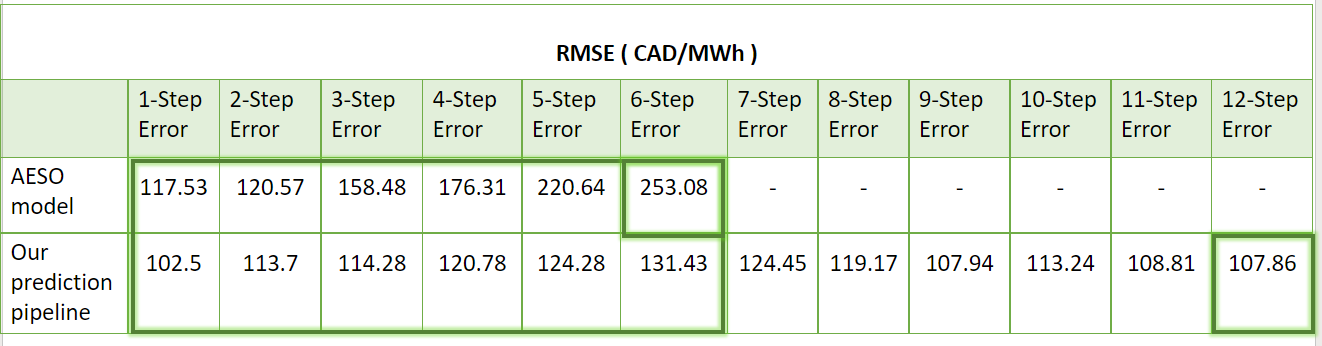


For the entire test set starting from Feb 2023 - May 2023, the results are given below - 
Light GBM generalized well and performed the best with an RMSE of 133.972 and std deviation of 114.48.

#### Data Product

Our data products offer a scalable and real-time prediction pipeline that accurately forecasts energy prices for the next 12 hours. These predictions come with a high level of explainability, allowing our partners to gain valuable insights and make well-informed decisions regarding their energy purchases. To facilitate this, we have developed a reactive tableau dashboard that empowers users to easily access and visualize real-time results.

The dashboard is thoughtfully structured into three primary sections to enhance user experience. At the top, the first section features a comprehensive 24-hour energy price timeline chart. This chart provides a holistic view of energy prices by displaying actual prices for the previous 12 hours and forecasted prices for the upcoming 12 hours. Additionally, each hourly prediction is accompanied by a 95% confidence interval, offering a clear representation of the margin of error associated with each forecast. By leveraging this chart, stakeholders can readily assess future price forecasts and gain valuable insights into their projected costs.

Moving to the lower left, the second section presents a dynamic bar chart that offers a deeper understanding of the key factors driving each prediction. The chart highlights the top four features that contribute to each prediction, providing accompanying explanatory text for further clarity. Other contributing features are grouped under the category of "Others" due to their multitude. Notably, this bar chart is designed to be reactive, meaning it dynamically updates as users hover over specific predictions in the first chart.
Finally, the third section showcases a time series plot illustrating four significant global factors that exhibit a correlation with energy prices. 

More info on architecture, please check the Appendix section.

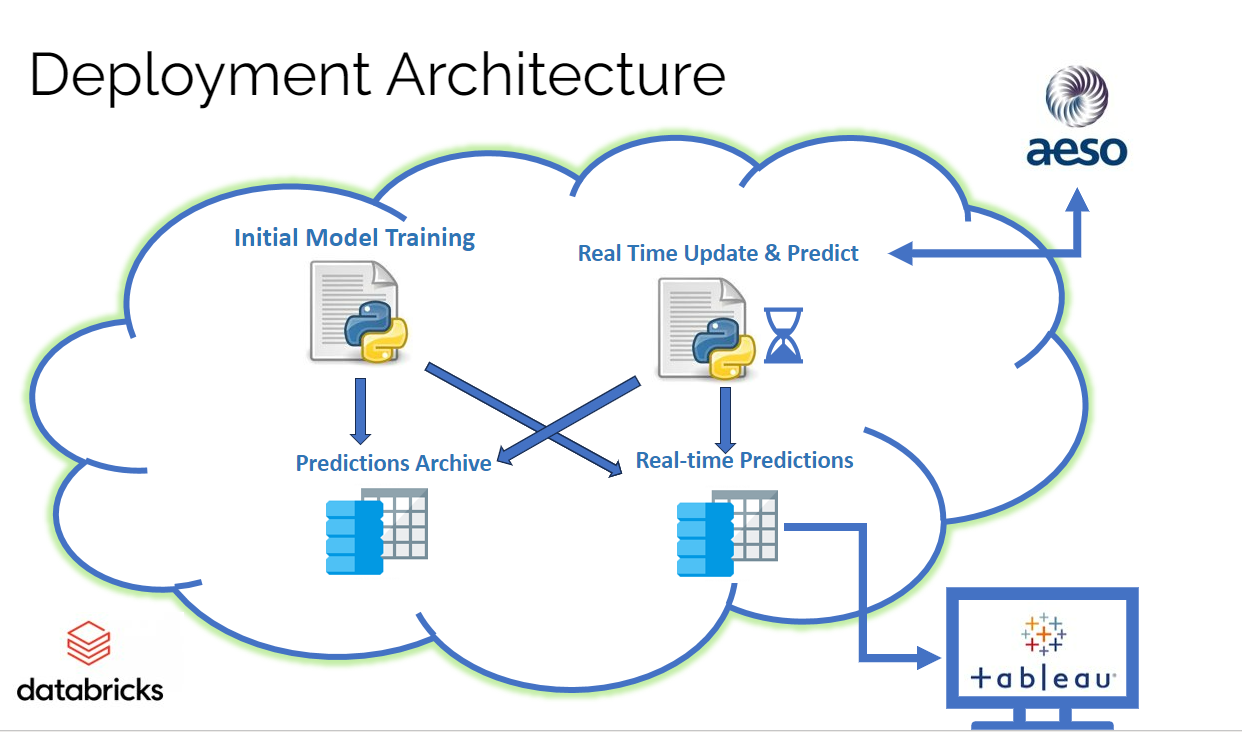

### Conclusion and Recommendations 

In Alberta's liberalized market, predicting power prices is an intricate task, as it relies on a balance between supply and demand, intertwined with multiple influencing factors. The high volatility mixed up with seasonality patterns, coupled with the lack of clear patterns, further compounds the challenge of accurate forecasting. These challenges become pronounced as our prediction window extends to 12 hours. Data availability also poses a hurdle, particularly for real-time, hourly power price predictions. Despite identifying significant features, their acquisition in an hourly, real-time format remains difficult.  Another crucial aspect of our project has been the constant tug-of-war between model accuracy and interpretability. While simpler models like ARIMA enhance interpretability, they lack the complexity to effectively address the problem. More complex models, conversely, offer high accuracy but compromise interpretability. Our current LightGBM model strikes a middle ground, but the ideal balance remains an exploratory challenge with numerous potential models yet to be examined.

In dealing with the data challenges encountered during the project, we developed an Azure function capable of scraping real-time power generation data from hourly online reports after we received approval from AESO. This solution addresses the issue of data availability, and the function can be added to our pipeline in the future. We also encountered challenges when using the sktime package. Moving forward, it could be advantageous to develop certain components internally, which would allow us to optimize our pipelines and have greater control over them.

Despite the numerous challenges encountered, we were successful in achieving our scientific objectives. We developed a product capable of delivering 12-hour forecasts with a high level of interpretability and a defined margin of error, empowering energy buyers to make well-informed decisions with greater confidence which will potentially help them in business planning and optimization. The journey was arduous, but as the saying goes, "Nothing worth having comes easy." 

## Appendix

### Training and Test Split


For the modeling purpose, we partitioned our data into two subsets: training and testing. The training data encompasses the period from January 2021 to January 2023, while the test set refers to the data from February - May 2023. Given the absence of real-time data for all features through the API, we leveraged historical data to simulate a real-time prediction system. The simulated system provides real-time forecasts starting from February 1, 2023. When real-time data becomes accessible for the clients, they can seamlessly swap the data sources, thereby enabling real-time data flow into the model which will make real-time predictions.

### Cross Validation 

Our training data spanned from January 1st, 2021, to January 31st, 2023. To capture any seasonality in price variation over time, we initially trained our models using two years' worth of data. For cross-validation, we utilized the entire month of January 2023, creating 63 folds to validate our models. Since our data is time series data, preserving the temporal order of the data in each fold was crucial. The first fold consisted of an initial training window of two years and a validation set spanning 12 hours of data. We made predictions for these 12 hours and compared them with the actual prices in the validation set to calculate the errors. We then expanded the training window by including the 12 hours of data from the validation set and proceeded to predict the next 12 hours. This process was repeated for a total of 63 folds.


#### Experimented models

 Our initial choice for modeling was Elastic Net CV, a linear regression model that effectively handles multicollinearity and supports feature selection. Given our emphasis on interpretability, a linear model was a suitable option as it offers a straightforward interpretation of coefficients and relationships between variables. In addition to Elastic Net CV, we explored the Random Forest Regressor model. Random Forest Regressor helps mitigate overfitting and can capture complex nonlinear relationships present in the data. We also considered XGBoost and Light GBM which are powerful gradient-boosting algorithms that excel in efficiency and have a strong track record in various domains. LightGBM specifically satisfied all our requirements, including accuracy, scalability, managing multicollinearity, and efficient model fitting. It particularly excelled when loaded on a GPU, enabling faster training times for large datasets. Notably, LightGBM supports warm initialization, enabling rapid model refitting on new data, which was essential for our real-time forecasting scenario.

### Interpretibility of Predictions

The local interpretability of predictions obtained using SHAP values helps us understand the factors driving individual predictions. To establish a reference point for comparison, we used a base value, which represents the average value of predictions made by the model. This base value acts as a benchmark, allowing us to evaluate the impact of each feature in relation to the model's expected output. The SHAP values can be positive or negative, indicating the direction and magnitude of influence. Positive SHAP values indicate that a feature positively influenced the prediction, pushing the prediction value higher than the base score. Conversely, negative SHAP values indicate a negative influence on the prediction. In our dashboard or visualizations, we explicitly showcased the percentage increase or decrease contributed by each feature compared to the base score. This provides a clear understanding of how much each feature contributes to the current prediction, allowing for intuitive interpretation and explanation of the model's behavior. For obtaining the confidence interval, since our final model, LightGBM supports quantile regression, we trained two separate LightGBM models with the objective as quantile regression. The first LightGBM model was trained to predict the upper limit of the confidence interval. To achieve this, we configured the desired quantile to be 0.975, representing the 97.5th percentile of the distribution. The second LightGBM model was trained to predict the lower limit of the interval, with the desired quantile set to 0.025, representing the 2.5th percentile. After training the models, we utilized the predict() method to obtain the predicted quantiles for each prediction. These predicted quantiles represented the upper and lower limits of the 95% confidence interval. This provided a measure of uncertainty and allowed us to communicate the level of confidence associated with our forecasts which facilitated better decision-making and risk assessment.

### Deployment Architecture 

In order to make our machine learning pipeline scalable, we have deployed our product in Databricks. Our architecture involves two main jobs running within Databricks. We also have two storage units - one for storing the predictions for the dashboard and the second one for archiving all the predictions made by the model. The first job serves as our initial training pipeline, responsible for training the model using the training dataset and subsequently saving the trained model. We also store the model predictions, upper and lower limits, as well as the prediction explanations. These details are stored in both the real-time predictions table and the archive table.

To ensure the continuous availability of updated insights, our Tableau dashboard regularly retrieves new data from the real-time predictions table and refreshes its charts accordingly. 

In addition to the initial training pipeline, we have implemented an update job that runs on an hourly basis. This job retrieves the new actual power price for the past hour, typically published by the AESO API, every hour. However, due to current limitations in data availability, we simulate this process using historical data. The update job leverages these new values to refit the data in all 12 models, thereby generating the next set of predictions. These updated predictions are then seamlessly integrated with Tableau, allowing us to promptly update our visualizations and plots.

To ensure the timely and accurate generation of real-time hourly predictions, the update job operates on a timer trigger, guaranteeing that our predictions and other artifacts remain up to date and aligned with the latest data. 

Databricks is highly scalable and capable of handling data-intensive processes, making it an ideal computing engine. Conversely, Tableau stands out for its user-friendly maintenance and extensive built-in features, making it an efficient tool for visualizing predictions. Tableau seamlessly integrates with various data sources, enabling easy access and analysis within a unified interface. However, there are certain challenges to consider. Currently, our Databricks cluster computation speed is slower than personal laptops due to a lack of GPU support in the current configuration. Additionally, certain features available in Python's Plotly are either absent or more challenging to implement in Tableau, given its non-code-based approach. The use of the Dash library in combination with Plotly could have provided more advanced and customizable visualizations, which unfortunately we were unable to explore due to time constraints.